# Understanding Time Complexity with Big-O Notation

In computer science, **Big-O notation** is a way of describing the upper bound of an algorithm's time complexity. It provides an estimate of how an algorithm's runtime grows with respect to the size of its input data. Big-O notation is widely used to analyze and compare the efficiency of algorithms and to understand how they scale as the input size increases.

Big-O notation is expressed using the letter "O" followed by a mathematical function. Common Big-O notations include:

- **O(1)**: Constant time complexity, where the algorithm's runtime does not depend on the input size.
- **O(log n)**: Logarithmic time complexity, commonly found in efficient search and divide-and-conquer algorithms.
- **O(n)**: Linear time complexity, where the runtime grows linearly with the input size.
- **O(n log n)**: Linearithmic time complexity, often seen in efficient sorting algorithms.
- **O(n^2)**: Quadratic time complexity, common in nested loops and inefficient algorithms.
- **O(2^n)**: Exponential time complexity, usually seen in brute-force algorithms.
- **O(n!)**: Factorial time complexity, representing an extremely inefficient algorithm.

In this Jupyter Notebook, we will explore and analyze the time complexity of various code snippets and algorithms using Big-O notation.


In [1]:
import timeit
import matplotlib.pyplot as plt
import random

default_repetitions = 25


def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)

    return wrapped


def timer(func, n, repetitions):
    wrapped = wrapper(func, n)
    times = timeit.repeat(wrapped, repeat=repetitions, number=1)
    return min(times) * 1000


def plot_task(
    func,
    start,
    end,
    step,
    title,
    xlabel,
    ylabel,
    scale="linear",
    repetitions=default_repetitions,
):
    if scale == "log":
        x = [2**i for i in range(start, end, step)]
    else:
        x = list(range(start, end, step))
    y = [timer(func, i, repetitions=repetitions) for i in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, "ro-", label=title)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    if scale == "log":
        plt.xscale("log")
        plt.yscale("log")

    plt.show()

## Example 1

Evaluate time complexity of the following function.


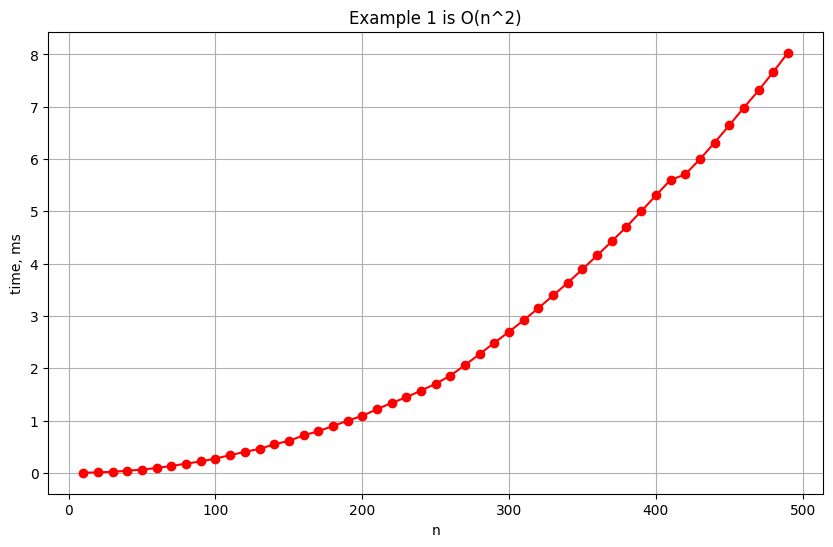

In [2]:
def task_1(n):
    test = 0
    for i in range(n):
        for j in range(n):
            test = test + i * j
    return test


plot_task(task_1, 10, 500, 10, "Example 1 is O(n^2)", "n", "time, ms")

## Example 2

Evaluate time complexity of the following function.


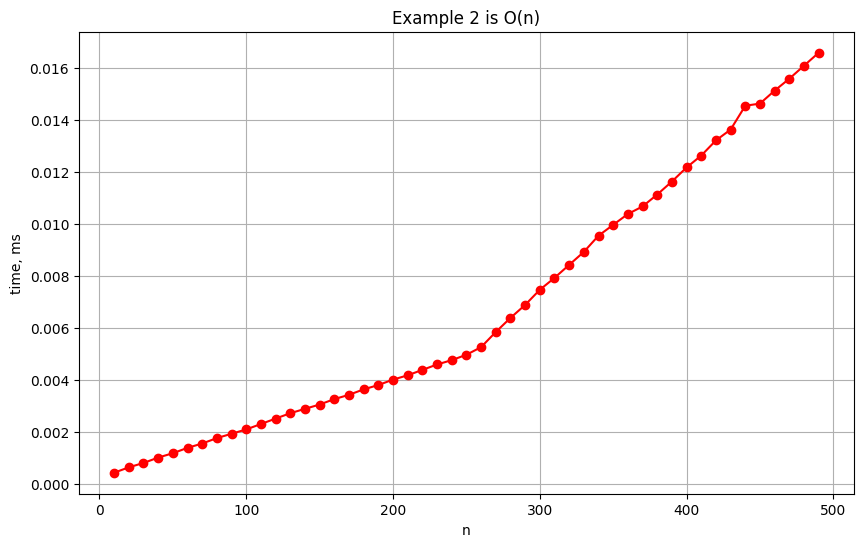

In [3]:
def task_2(n):
    test = 0
    for i in range(n):
        test = test + 1
    for j in range(n):
        test = test - 1
    return test


plot_task(task_2, 10, 500, 10, "Example 2 is O(n)", "n", "time, ms")

## Example 3

Evaluate time complexity of the following function.


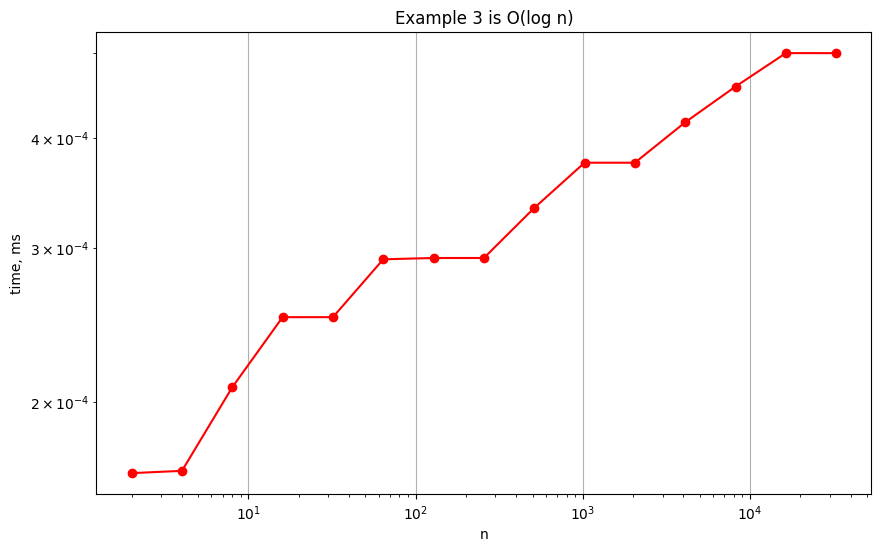

In [4]:
def task_3(n):
    i = n
    while i > 0:
        k = 2 + 2
        i = i // 2
    return k


plot_task(task_3, 1, 16, 1, "Example 3 is O(log n)", "n", "time, ms", scale="log")

## Example 4

Evaluate time complexity of the following function.


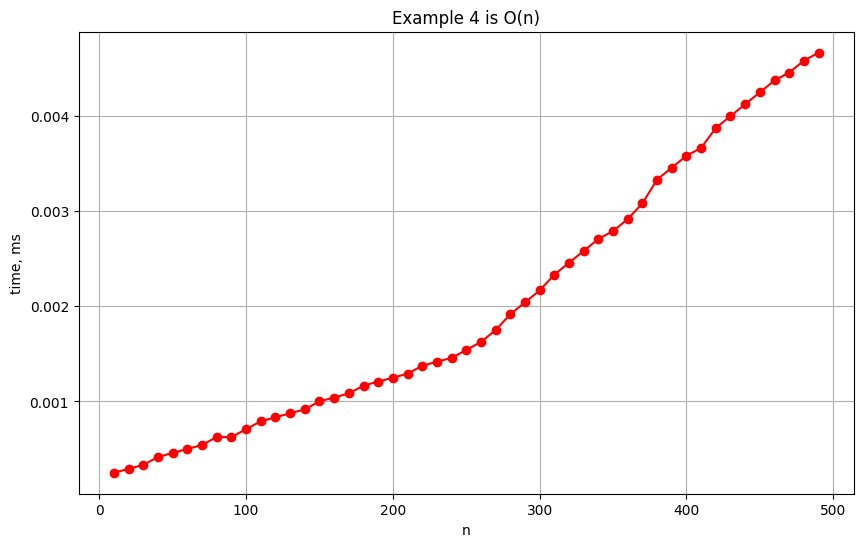

In [5]:
def task_4(n):
    k = 0
    for i in range(n):
        k = 2 + 2
    return k


plot_task(task_4, 10, 500, 10, "Example 4 is O(n)", "n", "time, ms")

## Example 5

Evaluate time complexity of the following function.


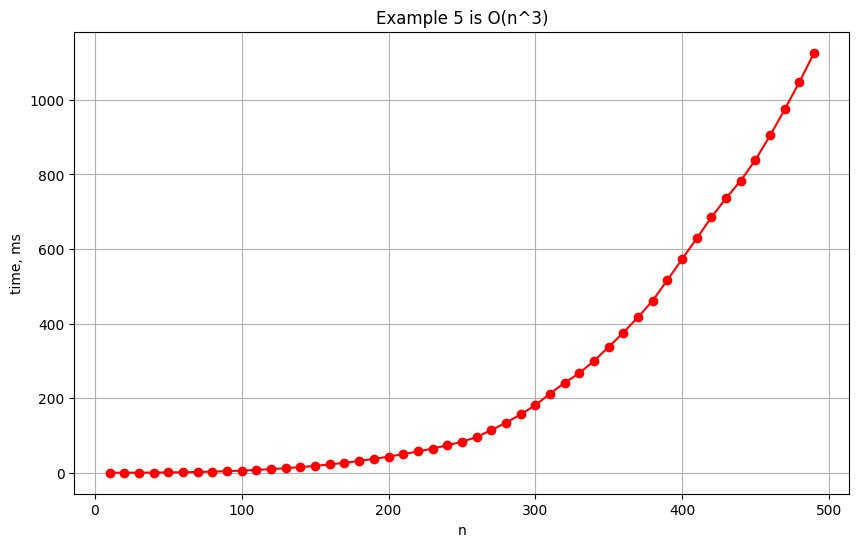

In [6]:
def task_5(n):
    k = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                k = 2 + 2
    return k


plot_task(task_5, 10, 500, 10, "Example 5 is O(n^3)", "n", "time, ms")

## Example 6

Confirming **O(1)** time complexity of list indexing.


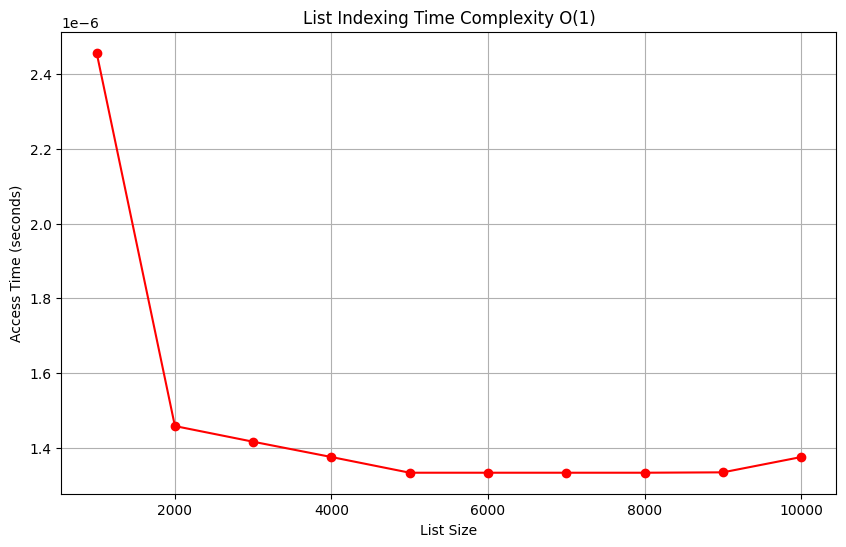

In [7]:
def access_list_element(lst, index):
    return lst[index]


def list_access_experiment(list_sizes, repetitions):
    access_times = []
    for size in list_sizes:
        my_list = list(range(size))
        random_index = random.randint(0, size - 1)
        access_time = timeit.timeit(
            lambda: access_list_element(my_list, random_index), number=repetitions
        )
        access_times.append(access_time)
    return access_times


list_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
repetitions = default_repetitions
access_times = list_access_experiment(list_sizes, repetitions)

plt.figure(figsize=(10, 6))
plt.plot(list_sizes, access_times, "ro-", label="List Access Time")
plt.title("List Indexing Time Complexity O(1)")
plt.xlabel("List Size")
plt.ylabel("Access Time (seconds)")
plt.grid(True)
plt.show()

## Example 7

Confirming **O(1)** Time complexity of dictionary access and update.


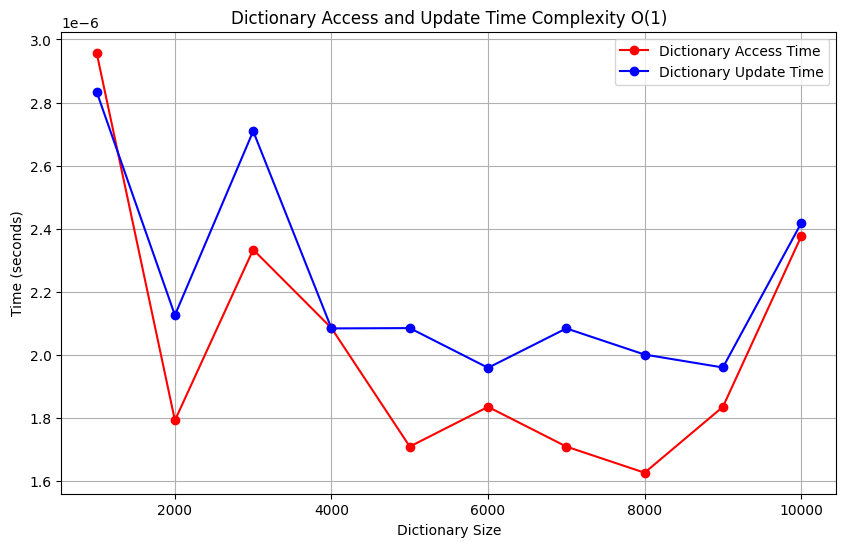

In [8]:
def access_dict_element(my_dict, key):
    return my_dict[key]


def update_dict_element(my_dict, key, value):
    my_dict[key] = value


def dict_access_experiment(dict_sizes, repetitions):
    access_times = []
    update_times = []
    for size in dict_sizes:
        my_dict = {i: i for i in range(size)}
        random_key = random.randint(0, size - 1)
        random_value = random.randint(0, size - 1)

        access_time = timeit.timeit(
            lambda: access_dict_element(my_dict, random_key), number=repetitions
        )
        access_times.append(access_time)

        update_time = timeit.timeit(
            lambda: update_dict_element(my_dict, random_key, random_value),
            number=repetitions,
        )
        update_times.append(update_time)
    return access_times, update_times


dict_sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
repetitions = default_repetitions
access_times, update_times = dict_access_experiment(dict_sizes, repetitions)

plt.figure(figsize=(10, 6))
plt.plot(dict_sizes, access_times, "ro-", label="Dictionary Access Time")
plt.plot(dict_sizes, update_times, "bo-", label="Dictionary Update Time")
plt.title("Dictionary Access and Update Time Complexity O(1)")
plt.xlabel("Dictionary Size")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

## Example 8

Comparing the performance of `del` operator for lists and dictionaries.


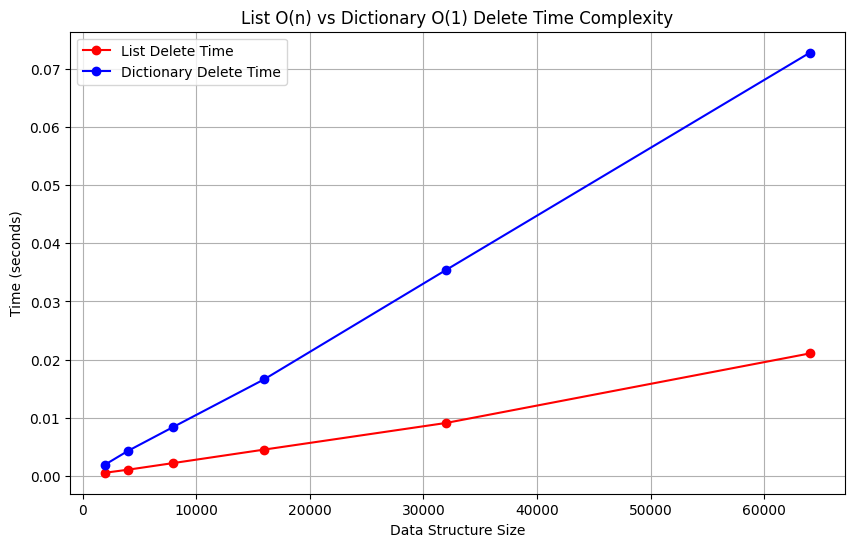

In [9]:
def list_delete_element(my_list, index):
    del my_list[index]


def dict_delete_element(my_dict, key):
    del my_dict[key]


def delete_experiment(data_structure_sizes, repetitions):
    list_delete_times = []
    dict_delete_times = []
    for size in data_structure_sizes:
        list_timer = timeit.Timer(
            lambda: list_delete_element(list(range(size)), size // 2)
        )
        list_delete_time = list_timer.timeit(number=repetitions)
        list_delete_times.append(list_delete_time)

        dict_timer = timeit.Timer(
            lambda: dict_delete_element({i: i for i in range(size)}, size // 2)
        )
        dict_delete_time = dict_timer.timeit(number=repetitions)
        dict_delete_times.append(dict_delete_time)

    return list_delete_times, dict_delete_times


data_structure_sizes = [2000, 4000, 8000, 16000, 32000, 64000]
repetitions = default_repetitions

list_delete_times, dict_delete_times = delete_experiment(
    data_structure_sizes, repetitions
)

plt.figure(figsize=(10, 6))
plt.plot(data_structure_sizes, list_delete_times, "ro-", label="List Delete Time")
plt.plot(data_structure_sizes, dict_delete_times, "bo-", label="Dictionary Delete Time")
plt.title("List O(n) vs Dictionary O(1) Delete Time Complexity")
plt.xlabel("Data Structure Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

## Example 9

Evaluate time complexity of the following function.


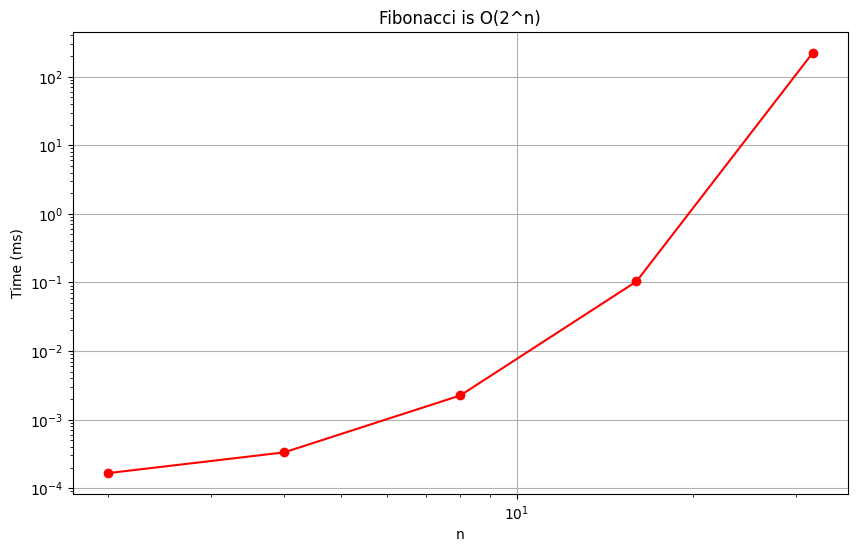

In [10]:
def fibonacci(n):
    if n < 2:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)


plot_task(
    func=fibonacci,
    start=1,
    end=6,
    step=1,
    title="Fibonacci is O(2^n)",
    xlabel="n",
    ylabel="Time (ms)",
    scale="log",
)

## Example 10

Evaluate time complexity of the following functions.


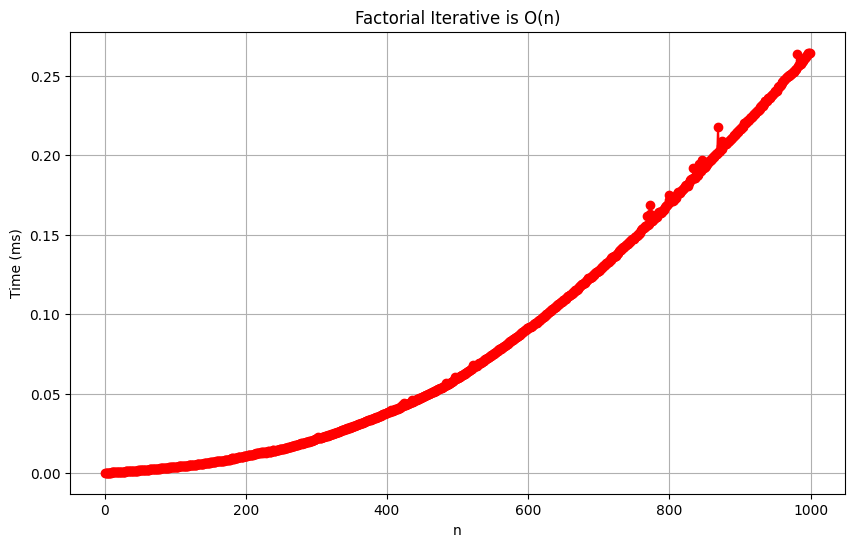

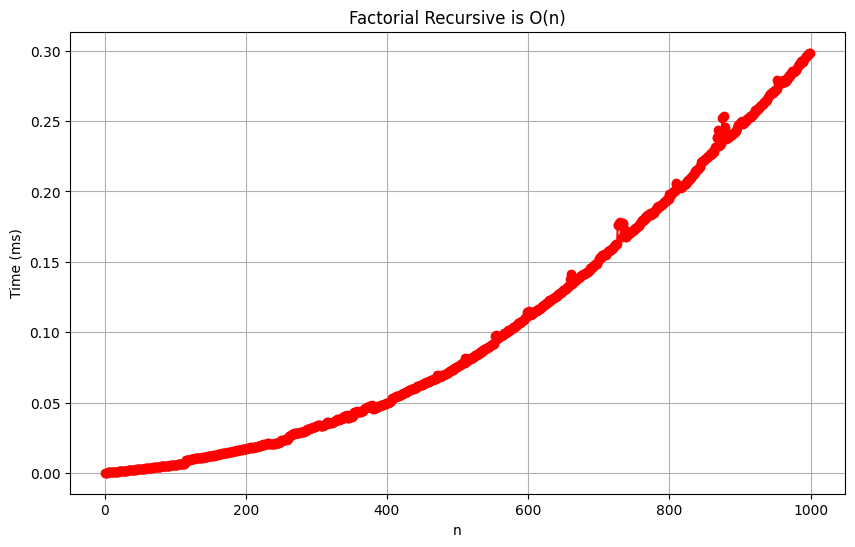

In [11]:
def factorial_iterative(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result


def factorial_recursive(n):
    if n == 0:
        return 1
    return factorial_recursive(n - 1) * n


plot_task(
    func=factorial_iterative,
    start=1,
    end=1000,
    step=1,
    title="Factorial Iterative is O(n)",
    xlabel="n",
    ylabel="Time (ms)",
)

plot_task(
    func=factorial_recursive,
    start=1,
    end=1000,
    step=1,
    title="Factorial Recursive is O(n)",
    xlabel="n",
    ylabel="Time (ms)",
)